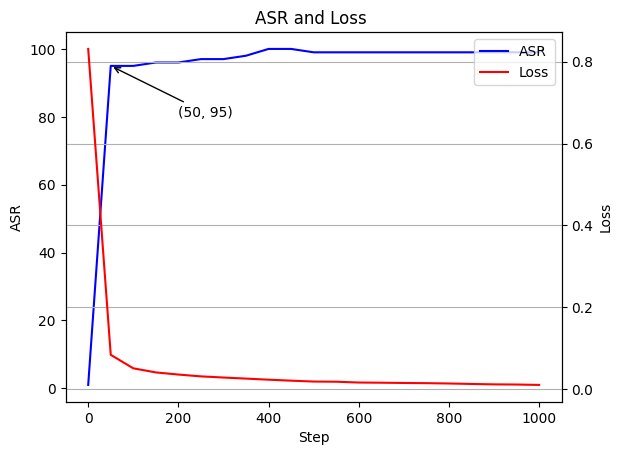

In [65]:
import re
import os
import matplotlib.pyplot as plt

y={}
for i in range(100):
    y[i]=[]

dirpath='/home/yjj/project/llm-attacks/experiments/individual weigth0'
for path in os.listdir(dirpath):
    if path.endswith('log') and path.startswith('individual'):
        namere=re.findall(r'behaviors_(\d+)-?(\d+)?',path)
        if namere[0][1]!='':
            count=int(namere[0][1])-int(namere[0][0])+1
        else:
            count=1
        with open(os.path.join(dirpath,path),'r') as log:
            content=log.read()
            res=re.findall(r'Passed   (\d)/1',content)
            for k in range(1,count+1):
                y[int(namere[0][0])+k-1]=list(map(lambda x:int(x),res[(k-1)*21:k*21]))

x=list(range(0,1001,50))
asr=[0,]*21
for j in range(21):
    for i in range(100):
        asr[j]+=y[i][j]

fig, ax1 = plt.subplots()
ax1.plot(x, asr,label='ASR',color='blue')
plt.title('ASR and Loss ')
plt.xticks(range(0,1001,200))
plt.xlabel('Step')
ax1.set_ylabel('ASR')
ax1.annotate('(50, 95)', xy=(50, 95), xytext=(200, 80),
            arrowprops=dict(arrowstyle = "->",facecolor='black'))

y={}
for i in range(100):
    y[i]=[]

dirpath='/home/yjj/project/llm-attacks/experiments/individual weigth0'
for path in os.listdir(dirpath):
    if path.endswith('log') and path.startswith('individual'):
        namere=re.findall(r'behaviors_(\d+)-?(\d+)?',path)
        if namere[0][1]!='':
            count=int(namere[0][1])-int(namere[0][0])+1
        else:
            count=1
        with open(os.path.join(dirpath,path),'r') as log:
            content=log.read()
            res=re.findall(r'Loss (\d+\.\d+)',content)
            for k in range(1,count+1):
                y[int(namere[0][0])+k-1]=list(map(lambda x:float(x),res[(k-1)*21:k*21]))

x=list(range(0,1001,50))
loss=[0.,]*21
for j in range(21):
    for i in range(100):
        loss[j]+=y[i][j]
    loss[j]/=100.

ax2 = ax1.twinx()
ax2.plot(x, loss,label='Loss',color='red')
ax2.set_ylabel('Loss')
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.grid()
plt.show()